In [18]:
library(lubridate)
library(ggplot2)
library(tidyverse)

In [39]:
#LLamado del archivo base
Oax_windspeeddata <- read.csv("~/GitHub/Proyecto_Energia_BEDU/2019_data_oaxaca_Windspeed.csv")

In [40]:
#Creando un archivo para modificar
wind1_Oax <- Oax_windspeeddata

In [41]:
#Muestra la estructura de los datos
str(wind1_Oax)

'data.frame':	52560 obs. of  2 variables:
 $ PCTimeStamp            : Factor w/ 52560 levels "01/01/2019 00:10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Avg.wind.speed.m.s.130m: num  13 14.5 13.1 14.1 13.2 11.5 11.3 10.6 10.5 10.7 ...


In [42]:
#Convierte todos los datos a dtos tipo caracter
wind1_Oax[] <- lapply(wind1_Oax, as.character)

In [43]:
#Muestra la estructura de los datos (deben ser caracteres)
str(wind1_Oax)

'data.frame':	52560 obs. of  2 variables:
 $ PCTimeStamp            : chr  "01/01/2019 00:10" "01/01/2019 00:20" "01/01/2019 00:30" "01/01/2019 00:40" ...
 $ Avg.wind.speed.m.s.130m: chr  "13" "14.5" "13.1" "14.1" ...


In [44]:
#Cuenta los datos nulos por columna
sapply(wind1_Oax, function(x) sum(is.na(x)))

PCTimeStamp Avg.wind.speed.m.s.130m 
                      0                     701

In [45]:
#Elimina filas con NA
wind1_Oax <- na.omit(wind1_Oax)

In [46]:
#Cuenta los datos nulos por columna
sapply(wind1_Oax, function(x) sum(is.na(x)))

PCTimeStamp Avg.wind.speed.m.s.130m 
                      0                       0

In [47]:
head(wind1_Oax)

,PCTimeStamp,Avg.wind.speed.m.s.130m
,<chr>,<chr>
1,01/01/2019 00:10,13
2,01/01/2019 00:20,14.5
3,01/01/2019 00:30,13.1
4,01/01/2019 00:40,14.1
5,01/01/2019 00:50,13.2
6,01/01/2019 01:00,11.5


In [48]:
#Convierte la variable PCTimeStamp a tipo fecha y Avg.wind.speed a dato numÃ©rico
wind1_Oax$PCTimeStamp <- parse_date_time(wind1_Oax$PCTimeStamp,"dmy HM")
wind1_Oax$Avg.wind.speed.m.s.130m <- as.numeric(wind1_Oax$Avg.wind.speed.m.s.130m)

In [49]:
#Crea las variables de: fecha, mes, dia, anio, hora y minuto por separado
wind1_Oax$fecha <- date(wind1_Oax$PCTimeStamp)
wind1_Oax$mes <- month(wind1_Oax$PCTimeStamp)
wind1_Oax$dia <- day(wind1_Oax$PCTimeStamp)
wind1_Oax$anio <- year(wind1_Oax$PCTimeStamp)
wind1_Oax$hora <- hour(wind1_Oax$PCTimeStamp)
wind1_Oax$minuto <- minute(wind1_Oax$PCTimeStamp)

In [50]:
#Elimina filas con NA
wind1_Oax <- na.omit(wind1_Oax)

In [51]:
#Defino donde voy a guardar mi archivo de respaldo
setwd("~/Proyecto_Energia")

In [52]:
#Guardamos nuestro nuevo archivo ya con los datos en las variables correctas
write.csv(wind1_Oax, file="Viento_Oax2019.csv", row.names = F)

In [53]:
#Muestra un resumen con las estadisticas basicas de cada variable
summary(wind1_Oax$Avg.wind.speed.m.s.130m)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.500   8.700   9.619  13.300  27.700 

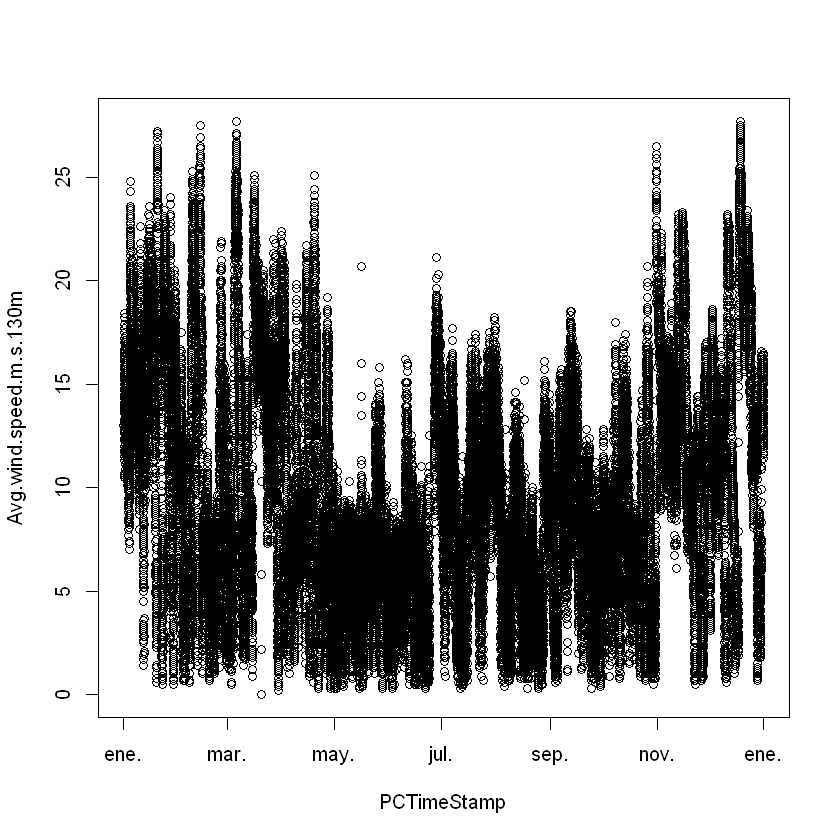

In [54]:
#Genera un archivo nuevo y grafica los datos para ver un primer comportamiento
wind_prueba_Oax <- wind1_Oax %>% select(1:2)
plot(wind_prueba_Oax)

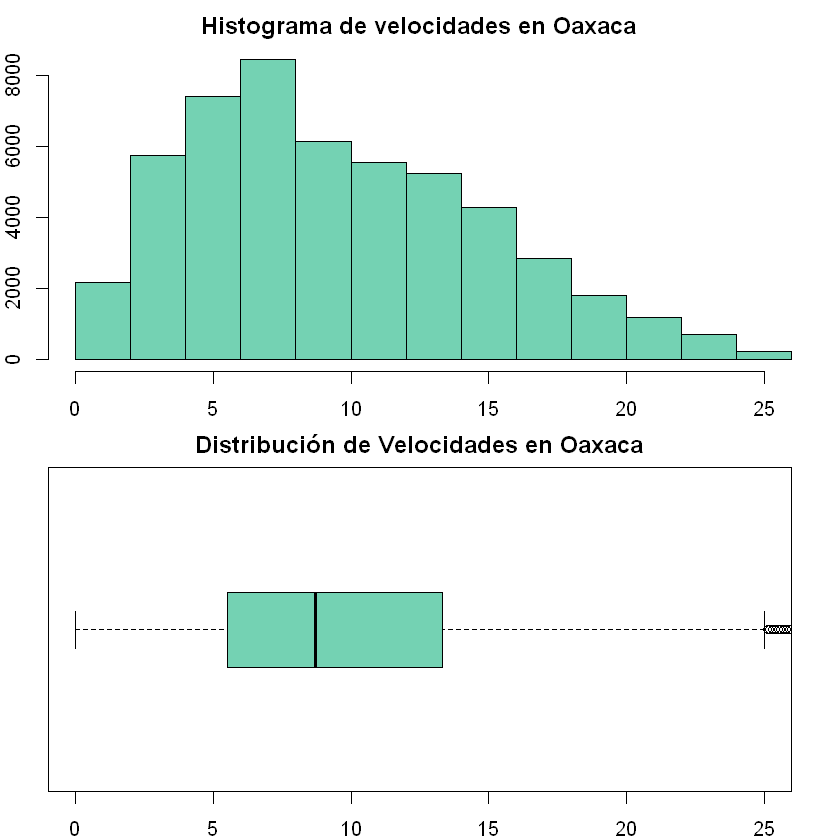

In [62]:
#Parte la pantalla en 2 filas y una columna ademÃ¡s de definir los margenes
par(mfrow = c(2,1), mar = c(2,2,2,2))
#La primera fila sera el histograma anual de velocidades
hist(wind_prueba_Oax$Avg.wind.speed.m.s.130m, main="Histograma de velocidades en Oaxaca", xlab="Velocidad del viento a 130m", ylab = "Frecuencia" , col="#74D2B3", xlim=c(0,25))

#La segunda fila es el diagrama de caja de las velocidades anuales a la misma escala
boxplot(wind1_Oax$Avg.wind.speed.m.s.130m, ylim= c(0,25), col="#74D2B3", horizontal = T, main = "Distribución de Velocidades en Oaxaca", xlab = "Velocidades a 130 m (m/s)", boxwex = 0.5)

<ul> Utilizando un codigo de boxplot sin gráfica nos muestra que los datos se clasifican de la siguiente manera: </ul>

<li> 0.0 inicio 1er cuartil </li> 
<li> 5.5  inicio 2do cuartil </li>
<li> 8.7  media </li>
<li> 13.3  final 3er cuartil </li>
<li> 25  final 4to cuartil </li>


In [56]:
#Genera un archivo llamado wind_mes_Oax ue agrupa los datos por mes y obtiene: minimo, promedio, media y mÃ¡ximo por mes
wind_mes_Oax <- wind1_Oax %>%
  group_by(mes =wind1_Oax$mes)%>%
  summarise(minim = min(Avg.wind.speed.m.s.130m,na.rm=T),mean = mean(Avg.wind.speed.m.s.130m,na.rm=T), mediana = median(Avg.wind.speed.m.s.130m,na.rm=T),max = max(Avg.wind.speed.m.s.130m,na.rm=T))

In [57]:
wind_mes_Oax

mes,minim,mean,mediana,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5,14.359543,14.8,27.2
2,0.6,9.679881,8.0,27.5
3,0.0,12.339729,13.1,27.7
4,0.3,9.304861,7.9,25.1
5,0.3,5.939095,5.9,20.7
6,0.3,6.733713,5.7,21.1
7,0.3,9.173477,9.7,18.2
8,0.3,6.573622,6.2,17.8
9,0.3,7.979050,7.7,18.5


In [58]:
#Guardo el resumen de cada mes eliminando el nÃºmer de dila al guardar
write.csv(wind_mes_Oax, file="Viento_mesOax.csv", row.names = F)

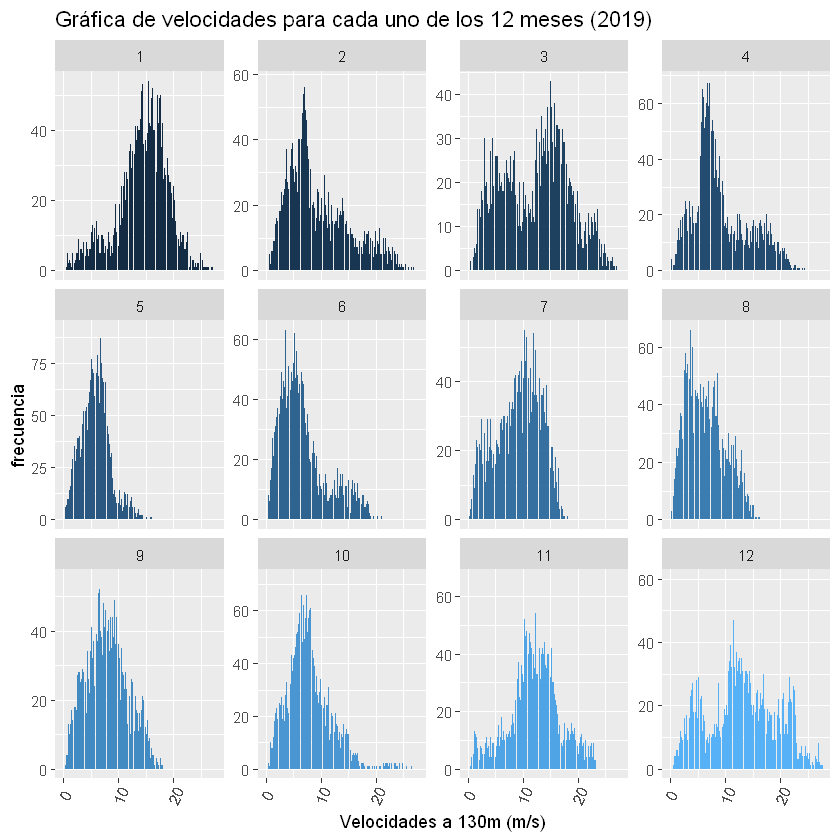

In [60]:
#Grafica las velocidades agrupandolas por mes
ggplot(data = wind1_Oax, aes(x = Avg.wind.speed.m.s.130m, fill = mes)) +
  geom_bar() +
  facet_wrap(~mes, scales = 'free_y')+
  theme(axis.text.x = element_text(angle=65, vjust=0.6),legend.position = "none") +
  xlab('Velocidades a 130m (m/s)')+
  ylab('frecuencia')+
  ggtitle('Gráfica de velocidades para cada uno de los 12 meses (2019)')